<a href="https://colab.research.google.com/github/Roopalsood/Linear-Regression/blob/main/House_price_prediction_Linear_regression_with_real_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#Linear Regression model. Its a Supervised Learning Model.

Data Set is downloaded from Kaggle. [Link for Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

House Price prediction using linear regression. It is a supervised learning model.
Here you can find the dataset downloaded from kaggle. [link to the dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) 


In [65]:
#to import dataset from google drive 
from google.colab import drive 
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [159]:
#importing libraries
import pandas as pd    # Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. Data Analyst
import numpy as np     #NumPy is a Python library used for working with arrays, linear algebra, fourier transform, and matrices.
import seaborn as sns  #Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
from matplotlib import pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

#%matplotlib #inline Matplotlib Inline is a package that supports Matplotlib to display plots directly inline and save them to notebooks.

In [67]:
import pandas as pd
HouseDataFrame = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/House price prediction using linear regression/Housing.csv")

PART 1 EXPLORING THE DATASET

In [68]:
HouseDataFrame.head()  #Gives the first five rows of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [201]:
 #all information related to the dataset
 #Converting Int, string values to float

HouseDataFrame.replace(('yes', 'no'), (1, 0), inplace=True)
HouseDataFrame.replace(('furnished', 'unfurnished', 'semi-furnished'), (1, 0, 0.5), inplace=True)
HouseDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 55.5 KB


In [202]:
HouseDataFrame.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.673394
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [203]:
HouseDataFrame.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

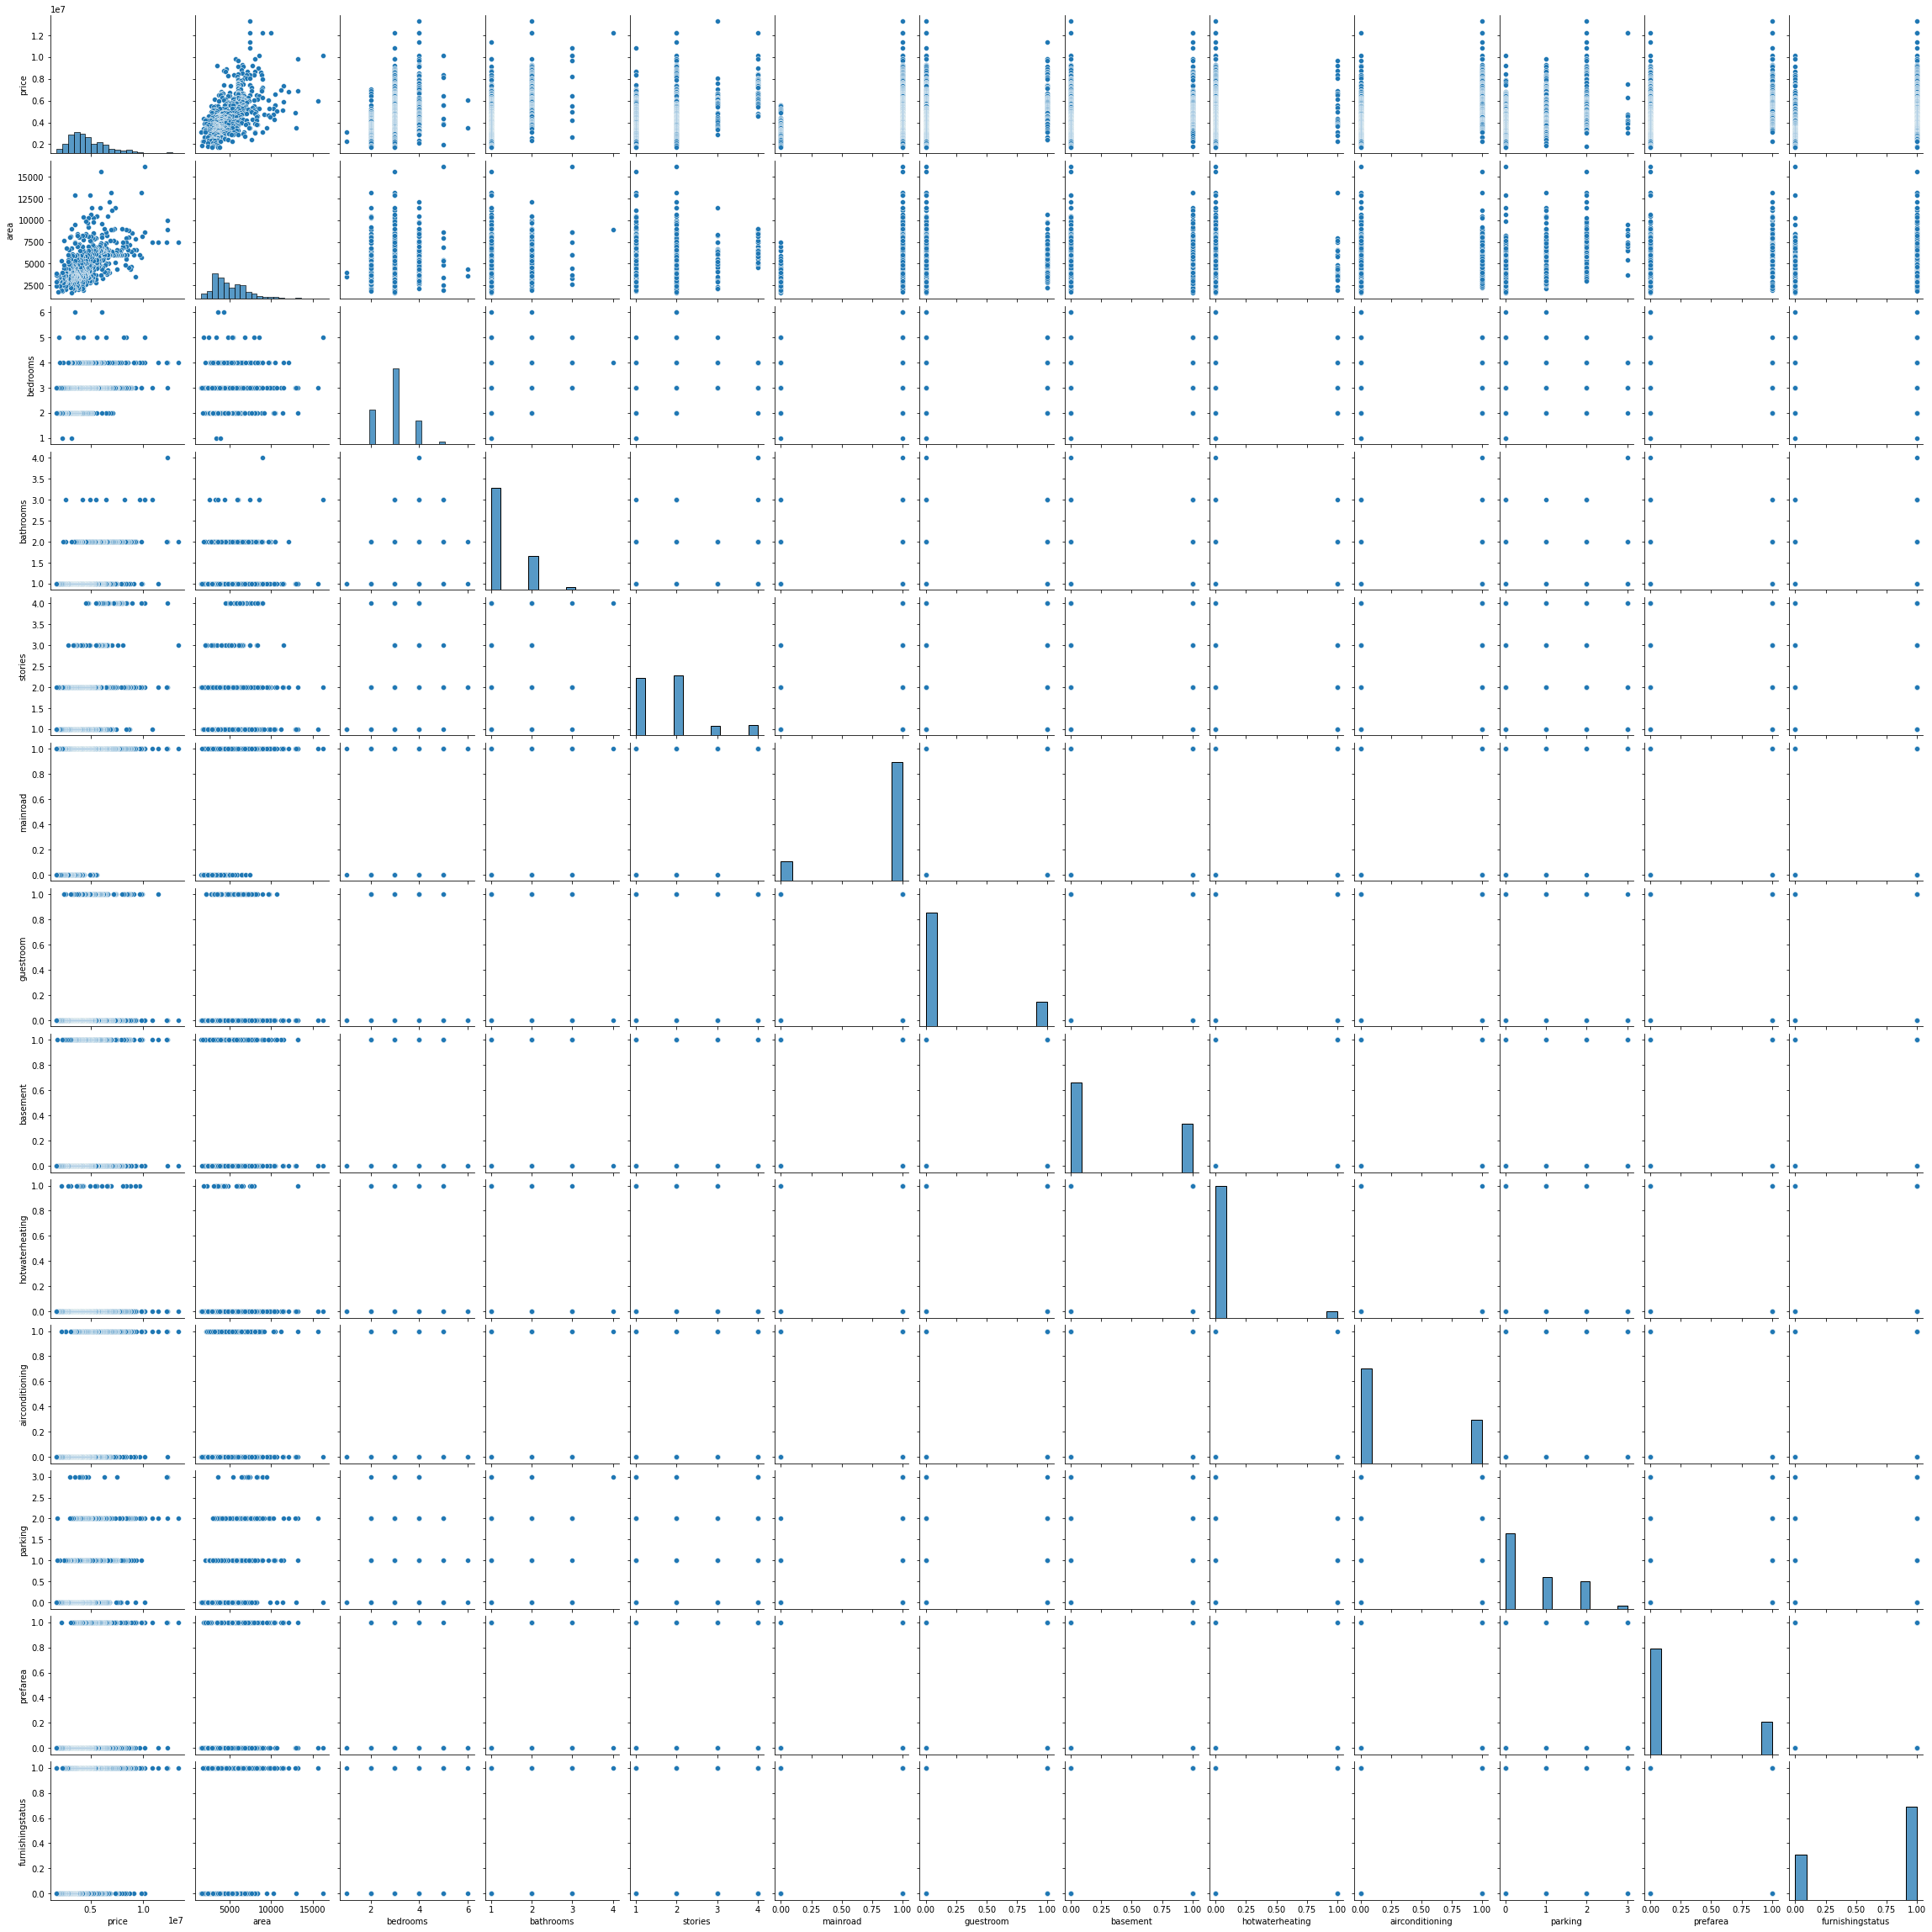

In [204]:
sns.pairplot(HouseDataFrame)  #The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset.

<AxesSubplot:>

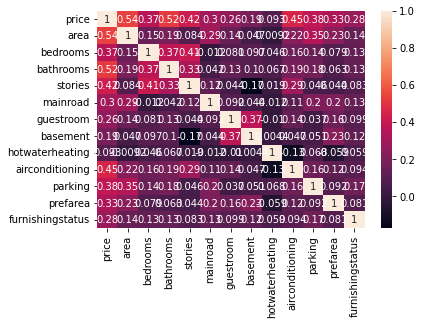

In [205]:
sns.heatmap(HouseDataFrame.corr(), annot = True) #corr = correalation

PART 2 BUILDING THE MODEL

In [206]:
X = HouseDataFrame[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

y =  HouseDataFrame[['price']]

In [207]:
#Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. 
#It provides a selection of efficient tools for machine learning and statistical modeling including classification,
# regression, clustering and dimensionality reduction via a consistence interface in Python.

from sklearn.model_selection import train_test_split 


In [208]:
#we have created two sets, one is train set of size 80% and the other is test set of size 20% and random state is 101 
#The random state hyperparameter in the train_test_split() function controls the shuffling process.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [209]:

#viewing train dataset
X_train 

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
430,2500.0,2.0,1.0,1.0,0,0,0,0,1,0.0,0,0
202,4120.0,2.0,1.0,1.0,1,0,1,0,0,1.0,0,1
490,4350.0,3.0,1.0,2.0,0,0,0,1,0,1.0,0,0
139,6360.0,3.0,1.0,1.0,1,1,1,0,1,2.0,1,1
237,5010.0,3.0,1.0,2.0,1,0,1,0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
316,5900.0,4.0,2.0,2.0,0,0,1,0,0,1.0,0,0
393,7424.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,0
75,4260.0,4.0,2.0,2.0,1,0,0,1,0,0.0,0,1
337,2145.0,4.0,2.0,1.0,1,0,1,0,0,0.0,1,0


In [210]:
#Importing linear regression model from scikit-learn

from sklearn.linear_model import LinearRegression

In [211]:
lm = LinearRegression()

TRAINING LINEAR REGRESSION MODEL

In [212]:
lm.fit(X_train, y_train)

LinearRegression()

In [213]:
coeff_df = pd.DataFrame(X.columns, columns=['Coefficient'])

In [214]:
coeff_df

,Coefficient
0,area
1,bedrooms
2,bathrooms
3,stories
4,mainroad
5,guestroom
6,basement
7,hotwaterheating
8,airconditioning
9,parking


In [215]:
predictions = lm.predict(X_test)

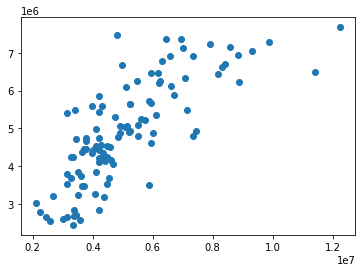

In [216]:
plt.scatter(y_test, predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


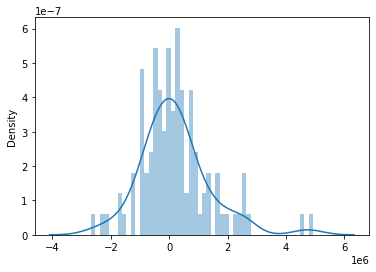

In [217]:
sns.distplot((y_test-predictions),bins=50);